In [371]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

import numpy as np
import matplotlib.pyplot as plt

In [372]:
from PIL import Image

In [373]:
def find_fre(arr):
    ansdick={}
    uniarr=set(arr)
    for i in uniarr:
        cntr=0
        temparr=arr.copy()
        while i in temparr:
            cntr=cntr+1
            nx=temparr.index(i)
            temparr[nx]='*'
        ansdick[i]=cntr
    
    return ansdick

In [374]:
import os
from PIL import Image
import numpy as np

data_path = r'D:\Github\Face-Recog\co-data' 
color_folders = os.listdir(data_path)  #listing all folders (colors)

train_img = []  
t_label=[]
target_size = (64, 64)  


for col_num,color_folder in enumerate(color_folders):
    color_path = os.path.join(data_path, color_folder)  #path to reach each color folder
    if os.path.isdir(color_path):
        for img_file in os.listdir(color_path):
            t_label.append(col_num)
            # counter=counter+1
            img_path = os.path.join(color_path, img_file)
            try:
                img = Image.open(img_path)
                img = img.resize(target_size)  #resizing the image to a common size
                img_array = np.array(img)
                # print(img_array.shape)
                
                if len(img_array.shape)==3 and img_array.shape[2]==3 :
                    # print(img_array,'end')
                    train_img.append(img_array)
                    
                    
                if len(img_array.shape)==2:
                    
                    # print(img_array.shape)
                    converted_array = np.expand_dims(img_array, axis=-1)
                    converted_array = np.repeat(converted_array, 3, axis=-1)
                    # print(converted_array.shape)
                    
                    train_img.append(converted_array)
                    
                elif img_array.shape[2]!=3 :
                    # print(img_array.shape)
                    converted_array2 = img_array[:, :, :3]
                    train_img.append(converted_array2)
                    
                    # print('convertion',converted_array.shape)
                    


            except Exception as e:
                print(img_array.shape)
                print(f"Error processing {img_path}: {e}")

# Convert the list of image arrays into a numpy array
# train_img = np.array(train_img)

print(f"number of images : {len(train_img)} \nnumber of generated labels : {len(t_label)}")

number of images : 225 
number of generated labels : 225


In [375]:
tdic=find_fre(t_label)
tdic

{0: 25, 1: 25, 2: 25, 3: 25, 4: 25, 5: 25, 6: 25, 7: 25, 8: 25}

In [376]:
color_folders

['Black',
 'Blue',
 'Brown',
 'Green',
 'Orange',
 'Red',
 'Violet',
 'White',
 'Yellow']

In [377]:
train_img=np.array(train_img)
train_img.shape

(225, 64, 64, 3)

In [378]:
for idx in train_img:
    pass
    # print(idx[:1,:1,:])
    # print(idx.shape)

In [379]:
# for ix in train_img:
#     plt.imshow(ix)
#     plt.title('Array Photo')
#     plt.show()

In [380]:
train_label = tf.keras.utils.to_categorical(t_label)
train_label

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [381]:
model = Sequential()

model.add(Flatten(input_shape=(64,64,3)))  # input layer and flattening the 64X64 images to a 1D array
model.add(Dense(128, activation='relu'))  # Hidden layer with 128 neurons
model.add(Dense(64, activation='relu'))  # Hidden layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model.add(Dense(16, activation='relu'))  # Hidden layer with 16 neurons
model.add(Dense(9, activation='softmax'))  # Output layer with 9 neurons (for 0-9 colors)

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [382]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 12288)             0         
                                                                 
 dense_49 (Dense)            (None, 128)               1572992   
                                                                 
 dense_50 (Dense)            (None, 64)                8256      
                                                                 
 dense_51 (Dense)            (None, 32)                2080      
                                                                 
 dense_52 (Dense)            (None, 16)                528       
                                                                 
 dense_53 (Dense)            (None, 9)                 153       
                                                                 
Total params: 1584009 (6.04 MB)
Trainable params: 158

In [383]:
train_img.shape

(225, 64, 64, 3)

In [384]:
model.fit(train_img, train_label, epochs=200, batch_size=64, validation_split=0.2)

Epoch 1/200


3/3 [==============================] - 1s 152ms/step - loss: 481.0017 - accuracy: 0.2000 - val_loss: 2310.3984 - val_accuracy: 0.0000e+00
Epoch 2/200
3/3 [==============================] - 0s 57ms/step - loss: 947.6672 - accuracy: 0.1444 - val_loss: 994.7512 - val_accuracy: 0.1333
Epoch 3/200
3/3 [==============================] - 0s 45ms/step - loss: 505.0432 - accuracy: 0.2611 - val_loss: 652.9957 - val_accuracy: 0.0000e+00
Epoch 4/200
3/3 [==============================] - 0s 51ms/step - loss: 415.0833 - accuracy: 0.2611 - val_loss: 630.6297 - val_accuracy: 0.4444
Epoch 5/200
3/3 [==============================] - 0s 33ms/step - loss: 344.8518 - accuracy: 0.2167 - val_loss: 307.3711 - val_accuracy: 0.5556
Epoch 6/200
3/3 [==============================] - 0s 41ms/step - loss: 224.9829 - accuracy: 0.1889 - val_loss: 345.3048 - val_accuracy: 0.4444
Epoch 7/200
3/3 [==============================] - 0s 51ms/step - loss: 134.4841 - accuracy: 0.1944 - val_loss: 408.4190 - val_accuracy: 0

In [385]:
from PIL import Image


# Specify the image path
image_path = r"D:\Github\Face-Recog\cod\Testing\55.jpg"

# Load the image using PIL
image = Image.open(image_path)

# Convert the PIL image to a NumPy array
image_array = np.array(image)
image_array.shape

(400, 780, 3)

#Testing Starts here

In [417]:
def b_predict(inum):
    image_path = f"D:\Github\Face-Recog\Testing\\{inum}.jpg"

    image = Image.open(image_path)

    image_array = np.array(image)
    
    tes_img=image.resize((64,64))
    test_img=np.array(tes_img)
    
    tp=test_img.copy()
    test_img=test_img.reshape((1,64,64,3))
    prediction = model.predict(test_img)
    predicted_digit = prediction.argmax() #finding the digit with the highest probability
    
    plt.imshow(tp)
    plt.title(f'model predicts this photo colour as: {color_folders[predicted_digit]}')
    plt.show()


1/1 [==============================] - 0s 29ms/step


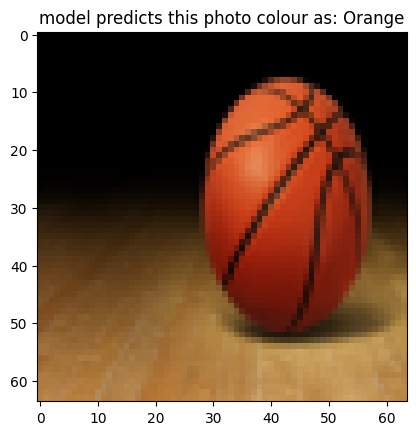

In [418]:
b_predict(11)